In [1]:
from scripts import network
import pandas as pd

wn = network.WaterDistributionNetwork('anytown.inp')

In [2]:
duration = 3600*24
hyd_step = 60*5

wn.set_time_params(duration=duration, hydraulic_step=hyd_step)

In [3]:
demand_patterns = pd.read_csv('../demand_patterns/demands_anytown.csv') 
wn.set_demand_pattern('week_0', demand_patterns['0'], wn.junctions)

In [4]:
demand_patterns

,0,1,2,3,4,5,6,7,8,9,...,147,148,149,150,151,152,153,154,155,156
0,0.389459,0.353364,0.358486,0.363991,0.405504,0.523564,0.583260,0.657340,0.745432,0.712561,...,0.347110,0.412607,0.532237,0.759267,0.765317,0.718328,0.651057,0.696424,0.538235,0.613465
1,0.353364,0.358486,0.363991,0.405504,0.523564,0.583260,0.657340,0.745432,0.712561,0.618783,...,0.412607,0.532237,0.759267,0.765317,0.718328,0.651057,0.696424,0.538235,0.613465,0.601958
2,0.358486,0.363991,0.405504,0.523564,0.583260,0.657340,0.745432,0.712561,0.618783,0.635493,...,0.532237,0.759267,0.765317,0.718328,0.651057,0.696424,0.538235,0.613465,0.601958,0.492703
3,0.363991,0.405504,0.523564,0.583260,0.657340,0.745432,0.712561,0.618783,0.635493,0.586629,...,0.759267,0.765317,0.718328,0.651057,0.696424,0.538235,0.613465,0.601958,0.492703,0.539765
4,0.405504,0.523564,0.583260,0.657340,0.745432,0.712561,0.618783,0.635493,0.586629,0.506193,...,0.765317,0.718328,0.651057,0.696424,0.538235,0.613465,0.601958,0.492703,0.539765,0.616491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.522184,0.472238,0.492512,0.462345,0.442110,0.488532,0.377334,0.351506,0.332307,0.447356,...,0.458865,0.479636,0.493182,0.367742,0.335222,0.348142,0.427876,0.577447,0.617178,0.778707
164,0.472238,0.492512,0.462345,0.442110,0.488532,0.377334,0.351506,0.332307,0.447356,0.533474,...,0.479636,0.493182,0.367742,0.335222,0.348142,0.427876,0.577447,0.617178,0.778707,0.776403
165,0.492512,0.462345,0.442110,0.488532,0.377334,0.351506,0.332307,0.447356,0.533474,0.640223,...,0.493182,0.367742,0.335222,0.348142,0.427876,0.577447,0.617178,0.778707,0.776403,0.726807
166,0.462345,0.442110,0.488532,0.377334,0.351506,0.332307,0.447356,0.533474,0.640223,0.728426,...,0.367742,0.335222,0.348142,0.427876,0.577447,0.617178,0.778707,0.776403,0.726807,0.706655


In [ ]:
wn.tanks['41'].tanklevel = 5
wn.tanks['42'].tanklevel = 4

In [5]:
wn.tanks.volume

C:\Users\david\Documents\PyCharmProjects\msc_thesis\epynet\baseobject.py:64: UserWarning: requesting dynamic properties from an unsolved network
  warnings.warn("requesting dynamic properties from an unsolved network")


41   -5176.923001
42   -5176.923001
dtype: float64

In [6]:
wn.run()

 29%|██▉       | 25200/86400 [00:08<00:22, 2727.58it/s]C:\Users\david\Documents\PyCharmProjects\msc_thesis\epynet\epanet2.py:679: UserWarning: WARNING: System has negative pressures.
  warnings.warn(self.ENgeterror(ierr))
100%|██████████| 86400/86400 [00:27<00:00, 3098.90it/s]


In [7]:
wn.df_nodes_report

node                 tanks                                               \
id                      41                          42                    
properties            head  pressure  level       head  pressure  level   
0 days 00:00:00  69.590543  3.055543  3.051  69.582847  3.047847  3.051   
0 days 00:00:09  69.657793  3.122793  3.051  69.583000  3.048000  3.051   
0 days 00:05:09  69.723958  3.188958  3.051  69.583000  3.048000  3.051   
0 days 00:10:09  69.789054  3.254054  3.051  69.583000  3.048000  3.051   
0 days 00:15:09  69.853098  3.318098  3.051  69.583000  3.048000  3.051   
...                    ...       ...    ...        ...       ...    ...   
0 days 23:43:06  69.583000  3.048000  3.051  69.583000  3.048000  3.051   
0 days 23:48:06  69.583000  3.048000  3.051  69.583000  3.048000  3.051   
0 days 23:53:06  69.583000  3.048000  3.051  69.583000  3.048000  3.051   
0 days 23:58:06  69.583000  3.048000  3.051  69.583000  3.048000  3.051   
1 days 00:00:00  69.583000  3.048000  3.051  69.583000  3.048000  3.051   

node             junctions                                      ...  \
id                       1                                      ...   
properties            head   pressure basedemand actual_demand  ...   
0 days 00:00:00  92.024319  85.928319  44.228934     44.228934  ...   
0 days 00:00:09  91.879778  85.783778  44.228934     44.228934  ...   
0 days 00:05:09  91.887279  85.791279  44.228934     44.228934  ...   
0 days 00:10:09  91.894665  85.798665  44.228934     44.228934  ...   
0 days 00:15:09  91.901939  85.805939  44.228934     44.228934  ...   
...                    ...        ...        ...           ...  ...   
0 days 23:43:06  90.661998  84.565998  55.823010     55.823010  ...   
0 days 23:48:06  90.661998  84.565998  55.823010     55.823010  ...   
0 days 23:53:06  90.661998  84.565998  55.823010     55.823010  ...   
0 days 23:58:06  90.661998  84.565998  55.823010     55.823010  ...   
1 days 00:00:00  91.404966  85.308966  50.704421     50.704421  ...   

node                                                                           \
id                      21                                                      
properties            head   pressure basedemand actual_demand demand_deficit   
0 days 00:00:00  69.586373  54.346373        0.0           0.0            0.0   
0 days 00:00:09  69.590626  54.350626        0.0           0.0            0.0   
0 days 00:05:09  69.657874  54.417874        0.0           0.0            0.0   
0 days 00:10:09  69.724036  54.484036        0.0           0.0            0.0   
0 days 00:15:09  69.789130  54.549130        0.0           0.0            0.0   
...                    ...        ...        ...           ...            ...   
0 days 23:43:06  61.873125  46.633125        0.0           0.0            0.0   
0 days 23:48:06  61.873126  46.633126        0.0           0.0            0.0   
0 days 23:53:06  61.873126  46.633126        0.0           0.0            0.0   
0 days 23:58:06  61.873126  46.633126        0.0           0.0            0.0   
1 days 00:00:00  67.313045  52.073045        0.0           0.0            0.0   

node                                                                           
id                      22                                                     
properties            head   pressure basedemand actual_demand demand_deficit  
0 days 00:00:00  69.585811  33.009811        0.0           0.0            0.0  
0 days 00:00:09  66.999969  30.423969        0.0           0.0            0.0  
0 days 00:05:09  67.052024  30.476024        0.0           0.0            0.0  
0 days 00:10:09  67.103225  30.527225        0.0           0.0            0.0  
0 days 00:15:09  67.153583  30.577583        0.0           0.0            0.0  
...                    ...        ...        ...           ...            ...  
0 days 23:43:06  56.452439  19.876439        0.0           0.0            0.0  
0 days 23:48:06  56

In [8]:
wn.tanks.level

,41,42
0,3.051,3.051
9,3.051,3.051
309,3.051,3.051
609,3.051,3.051
909,3.051,3.051
...,...,...
85386,3.051,3.051
85686,3.051,3.051
85986,3.051,3.051
86286,3.051,3.051


In [49]:
for tank in wn.tanks:
    print(tank.get_property(tank.properties['level']))

4.999999999999998
4.0


In [53]:
for tank in wn.tanks:
    print(wn.ep.ENgetnodevalue(tank.index, 8))

4.999999999999998
4.0


In [19]:
p20 = wn.junctions['20'].pressure
p20

0         85.939964
9         85.795883
309       85.803360
609       85.810722
909       85.817972
            ...    
603600    85.394419
603900    85.394419
604200    85.394420
604500    85.394419
604800    85.795045
Length: 2037, dtype: float64

In [18]:
print('max', max(p20))
print('min', min(p20))

max 86.09758046867661
min 82.24050885956541


In [1]:
%matplotlib notebook

<IPython.core.display.Javascript object>


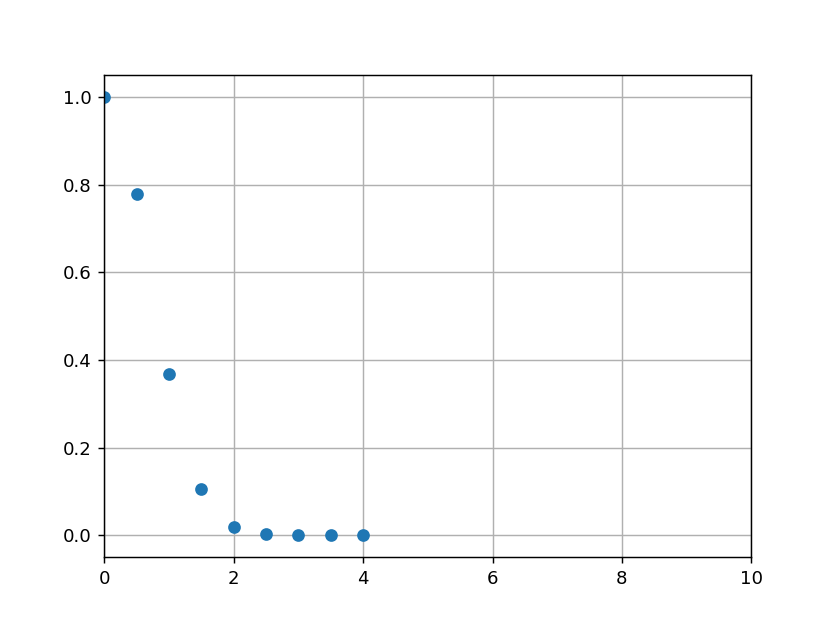

KeyboardInterrupt: 

In [4]:
import matplotlib.pyplot as plt
plt.ion()
class DynamicUpdate():
    #Suppose we know the x range
    min_x = 0
    max_x = 10

    def on_launch(self):
        #Set up plot
        self.figure, self.ax = plt.subplots()
        self.lines, = self.ax.plot([],[], 'o')
        #Autoscale on unknown axis and known lims on the other
        self.ax.set_autoscaley_on(True)
        self.ax.set_xlim(self.min_x, self.max_x)
        #Other stuff
        self.ax.grid()
        ...

    def on_running(self, xdata, ydata):
        #Update data (with the new _and_ the old points)
        self.lines.set_xdata(xdata)
        self.lines.set_ydata(ydata)
        #Need both of these in order to rescale
        self.ax.relim()
        self.ax.autoscale_view()
        #We need to draw *and* flush
        self.figure.canvas.draw()
        self.figure.canvas.flush_events()

d = DynamicUpdate()

import numpy as np
import time
d.on_launch()
xdata = []
ydata = []

for x in np.arange(0,10,0.5):
    xdata.append(x)
    ydata.append(np.exp(-x**2)+10*np.exp(-(x-7)**2))
    d.on_running(xdata, ydata)
    time.sleep(1)

In [6]:
import yaml
from mushroom_rl.core import Core
from mushroom_rl.algorithms.value import DQN
from mushroom_rl.approximators.parametric import TorchApproximator
from mushroom_rl.policy import EpsGreedy
from mushroom_rl.utils.parameters import LinearParameter, Parameter
from mushroom_rl.utils.replay_memory import ReplayMemory
from torch.optim.adam import Adam
from torch.nn import functional as F

from scripts.dqn import nn
from scripts.dqn.env import WaterNetworkEnvironment
from scripts.dqn.logger import InfoLogger

results_path = '../results/DQN'
config_file = '../scripts/dqn/anytown.yaml'

logger = InfoLogger(config_file[:-5], results_path)

config_file = 'anytown.yaml'

with open(config_file, 'r') as fin:
    hparams = yaml.safe_load(fin)

# Build the environment
env = WaterNetworkEnvironment(
    town=hparams['env']['town'],
    state_vars=hparams['env']['state_vars'],
    action_vars=hparams['env']['action_vars'],
    duration=hparams['env']['duration'],
    hyd_step=hparams['env']['hyd_step'],
    pattern_step=hparams['env']['pattern_step'],
    pattern_file=hparams['env']['pattern_file'],
    update_every=hparams['env']['update_every'],
    bounds=hparams['env']['bounds'],
    logger=logger
)

# Creating the epsilon greedy policy
epsilon_train = LinearParameter(value=1., threshold_value=.1, n=1000000)
epsilon_test = Parameter(value=.05)
epsilon_random = Parameter(value=1)
pi = EpsGreedy(epsilon=epsilon_random)

# Create the optimizer dictionary
optimizer = dict()
optimizer['class'] = Adam
optimizer['params'] = hparams['optimizer']

# Set parameters of neural network taken by the torch approximator
nn_params = dict(
    # input_shape=env.info.observation_space.shape[0],
    # output_shape=env.info.action_space.n,
    hidden_size=hparams['nn']['hidden_size']
)

# Create the approximator from the neural network we have implemented
approximator = TorchApproximator

# Set parameters of approximator
approximator_params = dict(
    network=nn.NN10Layers,
    input_shape=env.info.observation_space.shape,
    output_shape=(env.info.action_space.n,),
    n_actions=env.info.action_space.n,
    optimizer=optimizer,
    loss=F.smooth_l1_loss,
    batch_size=0,
    use_cuda=True,
    **nn_params
)

# Build replay buffer
replay_buffer = ReplayMemory(initial_size=hparams['agent']['initial_replay_memory'],
                             max_size=hparams['agent']['max_replay_size'])

# Build the agent
agent = DQN(
    mdp_info=env.info,
    policy=pi,
    approximator=approximator,
    approximator_params=approximator_params,
    batch_size=hparams['agent']['batch_size'],
    target_update_frequency=hparams['agent']['target_update_frequency'],
    replay_memory=replay_buffer,
    initial_replay_size=hparams['agent']['initial_replay_memory'],
    max_replay_size=hparams['agent']['max_replay_size'],
    # fit_params=None,
    # predict_params=None,
    # clip_reward=False
)

scores = []
n_epochs = hparams['learning']['epochs']
train_episodes = hparams['learning']['train_episodes']
train_frequency = hparams['learning']['train_frequency']

core = Core(agent, env)

# Fill replay memory with random data
pi.set_epsilon(epsilon_random)
core.learn(n_steps=hparams['agent']['initial_replay_memory'],
           n_steps_per_fit=hparams['agent']['initial_replay_memory'], render=True)

logger.evaluation_phase()
pi.set_epsilon(epsilon_test)
dataset = core.evaluate(n_episodes=1, render=True)
scores.append(logger.get_stats(dataset))
logger.end_phase()

for epoch in range(1, n_epochs + 1):
    logger.print_epoch(epoch)
    pi.set_epsilon(epsilon_train)
    logger.training_phase()
    core.learn(n_episodes=train_episodes, n_steps_per_fit=train_frequency, render=True)
    logger.end_phase()

    logger.evaluation_phase()
    pi.set_epsilon(epsilon_test)
    dataset = core.evaluate(n_episodes=5, render=True)
    scores.append(logger.get_stats(dataset))
    logger.end_phase()


Logging in folder: ..\..\results\DQN\..\scripts\dqn\anytown


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\david\\Documents\\PyCharmProjects\\results\\scripts\\dqn\\scripts\\dqn\\anytown.log'